<a href="https://colab.research.google.com/github/melvinmatanos2008/mfmpython1/blob/main/KNN%20Project_Data_301_11_8_21_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA BACKGROUND**

In observing the dataset before importing this is an advertising data set, indicates whether or not a customer clicked on an advertisement on a company website and the type of visitors that visit the site.


This data set contains the following variables:

'Daily Time Spent on Site': customer time on site, 'Age': customer age, 'Area Income': income of country area of customer, 'Daily Internet Usage': avg. minutes a day customer is on the internet, 'Ad Topic Line': advertisement name, 'City': city of customer, 'Male': whether or not customer was male (1)or female (0), 'Country': country of customer, 'Timestamp': time customer clicked on Ad, and 'Clicked on Ad': 0 indicates did not click on ad and 1 indicates clicked on Ad.




My analysis questions:

1. Which age group visited the site more?
2. Which gender visited the site more, female (0) or male (1)?
3. What was the average income vs. age that visited the site?
4. Which gender clicked on the ad more?
5. What age group clicked on the ad more?

## **DATA ACQUISITION**

Please note:  Models may be different each time you run the logistic and KNN models this is due because each time you run  the model they are being retrained. In turn, the models may make different predictions, and when evaluated, may have a different level of error or accuracy.

I imported the libraries I needed to use. 

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

I loaded the dataset.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising.csv')

Dataset has 1000 rows and 10 columns.


In [ ]:
df.shape

(1000, 10)

I did a df.head() and df.tail() to analyze the data. 

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


I did a df.describe() to view some basic statistical details like percentile, mean, std etc. of the dataframe's numeric value.

In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


I did a df.info() to check the data types of each variables and make sure they are correct. I observed that Daily Time Spent on Site, Area Income, and Daily Internet Usage need data type needed to be converted to integers. I also rename the columns Male to Male or Female. Meaning Male being 1 and Female 0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
(df.isnull().sum())

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].astype(np.int64)

In [ ]:
df['Area Income'] = df['Area Income'].astype(np.int64)

In [ ]:
df['Daily Internet Usage'] = df['Daily Internet Usage'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Daily Time Spent on Site  1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Area Income               1000 non-null   int64 
 3   Daily Internet Usage      1000 non-null   int64 
 4   Ad Topic Line             1000 non-null   object
 5   City                      1000 non-null   object
 6   Male                      1000 non-null   int64 
 7   Country                   1000 non-null   object
 8   Timestamp                 1000 non-null   object
 9   Clicked on Ad             1000 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 78.2+ KB


In [ ]:
df.rename(columns={'Male' : 'Male or Female'}, inplace=True)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male or Female,Country,Timestamp,Clicked on Ad
0,68,35,61833,256,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80,31,68441,193,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69,26,59785,236,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74,29,54806,245,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68,35,73889,225,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72,30,71384,208,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51,45,67782,134,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51,51,42415,120,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55,19,41920,187,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


I seperated the variables I wanted to work with from the data. 

## **DATA WRANGLING**

In [ ]:
ad_clicked = df[['Male or Female','Age', 'Area Income', 'Clicked on Ad']]
ad_clicked.head(20)

,Male or Female,Age,Area Income,Clicked on Ad
0,0,35,61833,0
1,1,31,68441,0
2,0,26,59785,0
3,1,29,54806,0
4,0,35,73889,0
5,1,23,59761,0
6,0,33,53852,0
7,1,48,24593,1
8,1,30,68862,0
9,1,20,55642,0


I wanted to see which gender clicked more on advertisement. More female clicked on advertisement then male. 

In [ ]:
pd.crosstab(ad_clicked['Male or Female'], ad_clicked['Clicked on Ad']).sort_values( 1,ascending = False).tail()

Clicked on Ad,0,1
Male or Female,,
0,250,269
1,250,231


I wanted to see how many visitor by age group clicked on ad. Age 45 with 27 times followed by age 38 and 34 with 25 times. The least were age 21 with no clicks at all followed by age 61, 22, 20, 19 with 1 click. 

In [ ]:
pd.crosstab(ad_clicked['Age'], ad_clicked['Clicked on Ad']).sort_values( 1,ascending = False).head(50)

Clicked on Ad,0,1
Age,,
45,3,27
38,12,25
36,25,25
41,10,22
42,6,20
50,1,19
43,4,19
40,17,19
49,1,17


The minimal area income of the person visiting the site is 13,996.50 with age being 41 and the max is 79,484.80 with age being 42.

In [ ]:
pd.crosstab(ad_clicked['Area Income'],ad_clicked['Age']).sort_values('Area Income',ascending = False).head()

Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
Area Income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
79484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(ad_clicked['Area Income'],ad_clicked['Age']).sort_values('Area Income',ascending = False).tail()

Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
Area Income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15879,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I wanted to see the minimum ads that were clicked by male or female, age and area income. 
I wasn't able to seperate male or female.

In [ ]:
ad_clicked.groupby('Clicked on Ad')['Clicked on Ad', 'Male or Female','Age', 'Area Income'].mean()
                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Clicked on Ad,Male or Female,Age,Area Income
Clicked on Ad,,,,
0,0.0,0.500,31.684,61385.074
1,1.0,0.462,40.334,48613.916


## **EXPLORATORY DATA ANALYSIS (EDA)**

I created a histogram of age.
We can see age is almost distributed normally. We can see that the average age visitor is between 30 and 36. We also see that the youngest  is visitor 19 and the oldest is 61 years old.

Text(0.5, 0, 'Age')

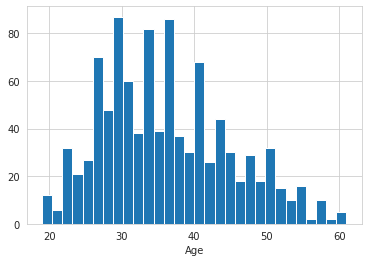

In [ ]:
sns.set_style('whitegrid')
ad_clicked['Age'].hist(bins=30)
plt.xlabel('Age')


I created a countplot of Female (0) or Male (1).
We can see that the site is visited more by women then male.

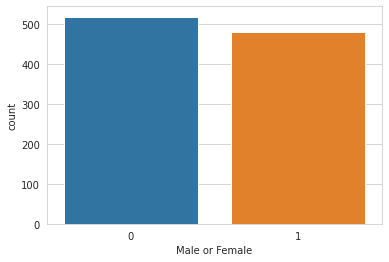

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Male or Female', data=ad_clicked)

I created a jointplot showing Area Income versus Age. We see that mostly the age group of 30 and 35 with higher earnings from 58k-68k visiting the site. 

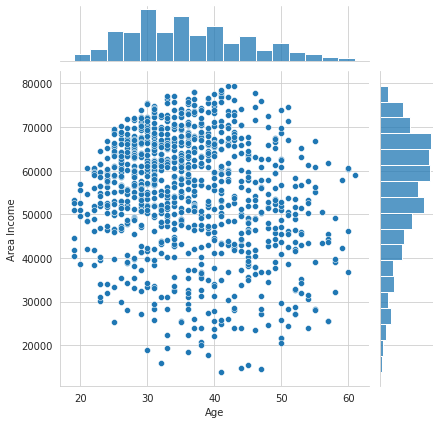

In [ ]:
sns.jointplot(x='Age',y='Area Income',data=ad_clicked)

I created a heatmap which shows a correlation between Age and Clicked on Ad. 

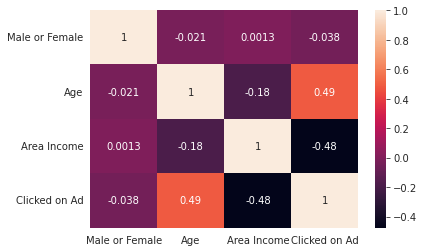

In [ ]:
sns.heatmap(ad_clicked.corr(),annot=True)

I created a pairplot with the hue defined by the 'Clicked on Ad'.
We can find several relationship between the features such as Daily Time Spent on Site, Age and Area Income and Daily Internet Usage, and Male or Female. 

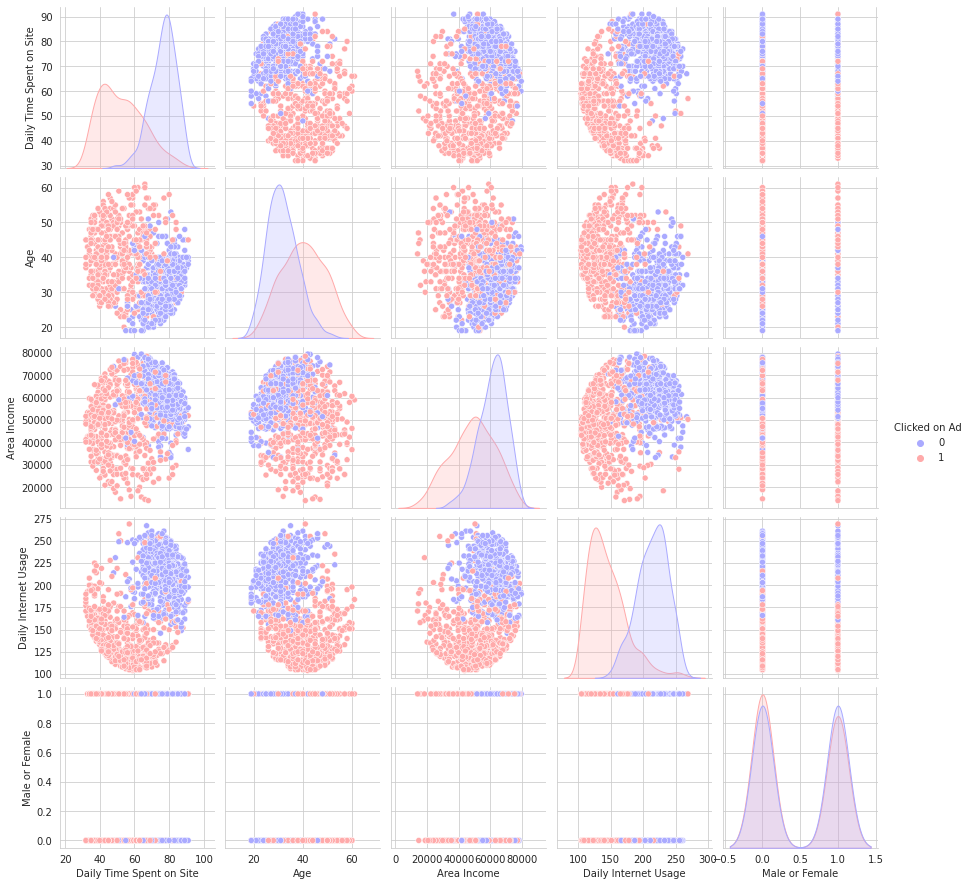

In [ ]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')

**LOGISTIC REGRESSION MODEL**

Once the dataset is processed, we need to divide it into two parts: training and test set. We will import and use the train_test_split function for that. I will use only Male or Female, Age, Area Income, variables which will be the input values X for the ML models. The variable Clicked on Ad will be stored in y, and will represent the prediction variable. We arbitrarily chose to allocate 25% of the total data for the training set.

I Split the data into training set and testing set using train_test_split

### **Train Test Split**

In [ ]:
x = df[['Daily Time Spent on Site',	'Age',	'Area Income',	'Daily Internet Usage', 'Male or Female']]

In [ ]:
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male or Female
0,68,35,61833,256,0
1,80,31,68441,193,1
2,69,26,59785,236,0
3,74,29,54806,245,1
4,68,35,73889,225,0


In [ ]:
y=ad_clicked[['Clicked on Ad']]

In [ ]:
y.head()

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0


In [ ]:
x.shape

(1000, 5)

In [ ]:
y.shape

(1000, 1)

Train and fit a logistic regression model on the training set.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logReg = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 5)
(250, 5)
(750, 1)
(250, 1)


In [ ]:
logReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### **Predictions and Evaluations**
Now predict values for the testing data.

In [ ]:
y_pred = logReg.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
y_test.values[0:10]

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [ ]:
y_pred[0:10]

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
logReg.score(x_test,y_test)

0.884

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.884

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[106,   8],
       [ 21, 115]])

Our confusion matrix tells us that the total number of accurate predictions is 123 + 102 = 225. The number of incorrect predictions is 11 + 14 = 25. We can be satisfied with the prediction accuracy of our model.

### **Create a classification report for the model.**

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       114
           1       0.93      0.85      0.89       136

    accuracy                           0.88       250
   macro avg       0.88      0.89      0.88       250
weighted avg       0.89      0.88      0.88       250



### **Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'predicted value')

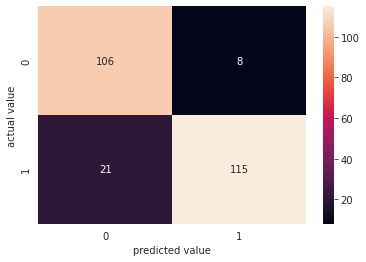

In [ ]:
sns.heatmap(cm,annot=True,fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')

The results from evaluation are as follows:

Yes, meaning visitors click on ad and No, meaning visitors did not click on ad. 

The classifier made a total of 250 predictions. Out of those 250 predictions, the classifier predicted "yes visitors will click on the advertisement" 113 times and "no visitors will not click on advertisement" 137 times. In reality, 116 visitors click on the advertisement, and 134 did not.

Confusion Matrix:

123 = True Negative, 14 = False Negative, 11 = False Positive, 102 = True Positive. Type 1 Error: 11 FP Type 2 Error: 14 FN

Accuracy: .90

Missclasification Rate "Error Rate": .10

True Positive Rate "Sensativeity Rate or Recall": .88

False Positive Rate: .08

True Negative Rate "Specificity": .92


Classification Report:

From the report obtained, the accuracy score is 90%. Hence the probability that the user can click on the ad is 90% out of 100 which is a great precision value to get a good model.

## **KNN Regression Model**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ad_clicked, df['Clicked on Ad'])

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 4)
(250, 4)
(750,)
(250,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[84, 42],
       [53, 71]])

In [ ]:
score = knn.score(x_test,y_test)

In [ ]:
score

0.62

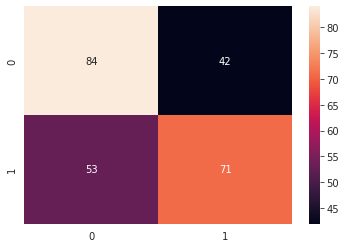

In [ ]:
sns.heatmap(cm, annot=True,fmt='0.0f')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       126
           1       0.63      0.57      0.60       124

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.62      0.62      0.62       250



The results from evaluation are as follows:

Yes, meaning visitors click on ad and No, meaning visitors did not click on ad.

The classifier made a total of 250 predictions. Out of those 250, the classifier predicted "yes" 115 times and "no" 135 times. In reality, 121 visitors click on the advertisement, and 129 did not.

Confusion Matrix:

89 = True Negative, 46 = False Negative, 40 = False Positive, 75 = True Positive. Type 1 Error: 49 FP Type 2 Error: 39 FN

Accuracy: .66

Missclasification Rate "Error Rate": .34

True Positive Rate "Sensativeity Rate or Recall": .62

False Positive Rate: .31

True Negative Rate "Specificity": .69

Classification Report:

From the report obtained, the accuracy score is 66%. Hence the probability that the user can click on the ad is 66% out of 100 which is not a great precision value to get a good model.

# KNN with K =5

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn5.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn5 = knn5.predict(x_test)

In [ ]:
y_pred_knn5

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
score_knn5 = knn5.score(x_test,y_test)
score_knn5

0.636

K Value and Accuracy

In [ ]:
from sklearn import metrics

In [ ]:
score = []

In [ ]:
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.62, 0.62, 0.656, 0.656, 0.636, 0.648, 0.656, 0.672, 0.664, 0.668, 0.66, 0.648, 0.66, 0.652, 0.656, 0.656, 0.664, 0.676, 0.672, 0.676, 0.68, 0.688, 0.676, 0.68, 0.676, 0.68, 0.68, 0.684, 0.684, 0.688, 0.688, 0.688, 0.684, 0.688, 0.684, 0.684, 0.676, 0.684, 0.68, 0.684, 0.676, 0.688, 0.68, 0.684, 0.672, 0.672, 0.672, 0.676, 0.68]


Text(0, 0.5, 'Accuracy Score')

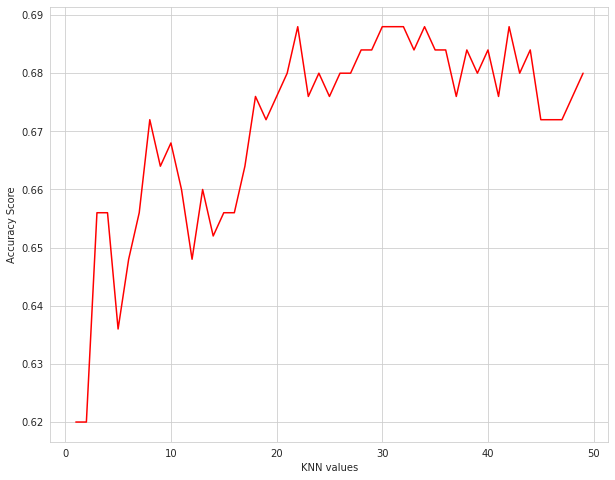

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score, color='red')
plt.xlabel('KNN values')
plt.ylabel('Accuracy Score')

# Error rate and K Value

In [ ]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

(Text(0, 0.5, 'Eror Rate'),)

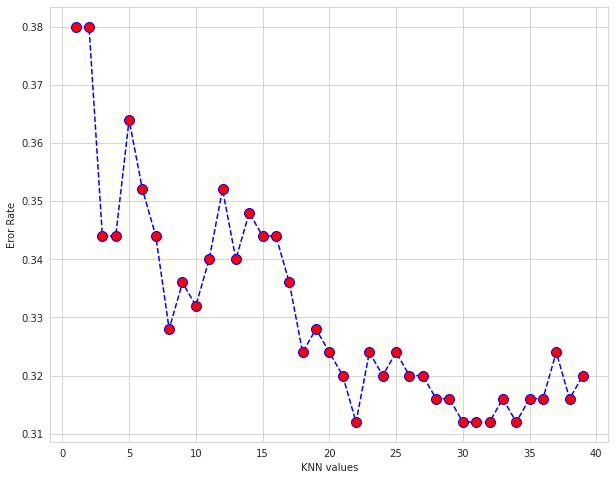

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
plt.xlabel('KNN values')
plt.ylabel('Eror Rate'), 

# **CONCLUSION**

In conclusion we can see that the average age visitor is between 30 and 36. We also see that the youngest is visitor 19 and the oldest is 61 years old. We can see that the site is visited more by women then male. Minimal area income of the person visiting the site is 13,996.50 with age being 41 and the max is 79,484.80 with age being 42. More female clicked on advertisement then male. Visitor by age group clicked on ad. is age 45 with 27 times followed by age 38 and 34 with 25 times. The least were age 21 with no clicks at all followed by age 61, 22, 20, 19 with 1 click. 

It can also be concluded that the Logistic Regression Model showed better performances in comparison to the KNN model. The confusion matrix in the Logistic model shows us that the 225 predictions have been done correctly and that there are only 25 incorrect predictions. Additionally, Logistic Regression Model accuracy is better by about .25 in comparison to the KNN model.

Therefore, as per this analysis the marketing approach needs to be improved in order to get more visitors to click on a particular advertisement. They need to attract more male and younger age groups between 19 to 22 and more senior citizen age group. 